<a href="https://colab.research.google.com/github/rafacampos10/Analise-de-Dados/blob/main/RegressaoMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Descritiva**

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart_studio

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import matplotlib.pyplot as plt


import plotly.graph_objects as go
import plotly.express as px


In [ ]:
marketing = pd.read_csv("/content/drive/MyDrive/Escola DNC - Formação de Dados/Desafios/Desafio 4/Dataset/MKT.csv")
marketing.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
marketing.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
fig = px.box(marketing,x="youtube")
fig.update_traces(line_color="red")

In [ ]:
fig = px.box(marketing,x="facebook")
fig.update_traces(line_color="blue")

In [ ]:
fig = px.box(marketing,x="newspaper")
fig.update_traces(line_color="green")

In [ ]:
fig = px.box(marketing,x="sales")
fig.update_traces(line_color="yellow")

# **Análise Exploratória**

In [ ]:
marketing.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


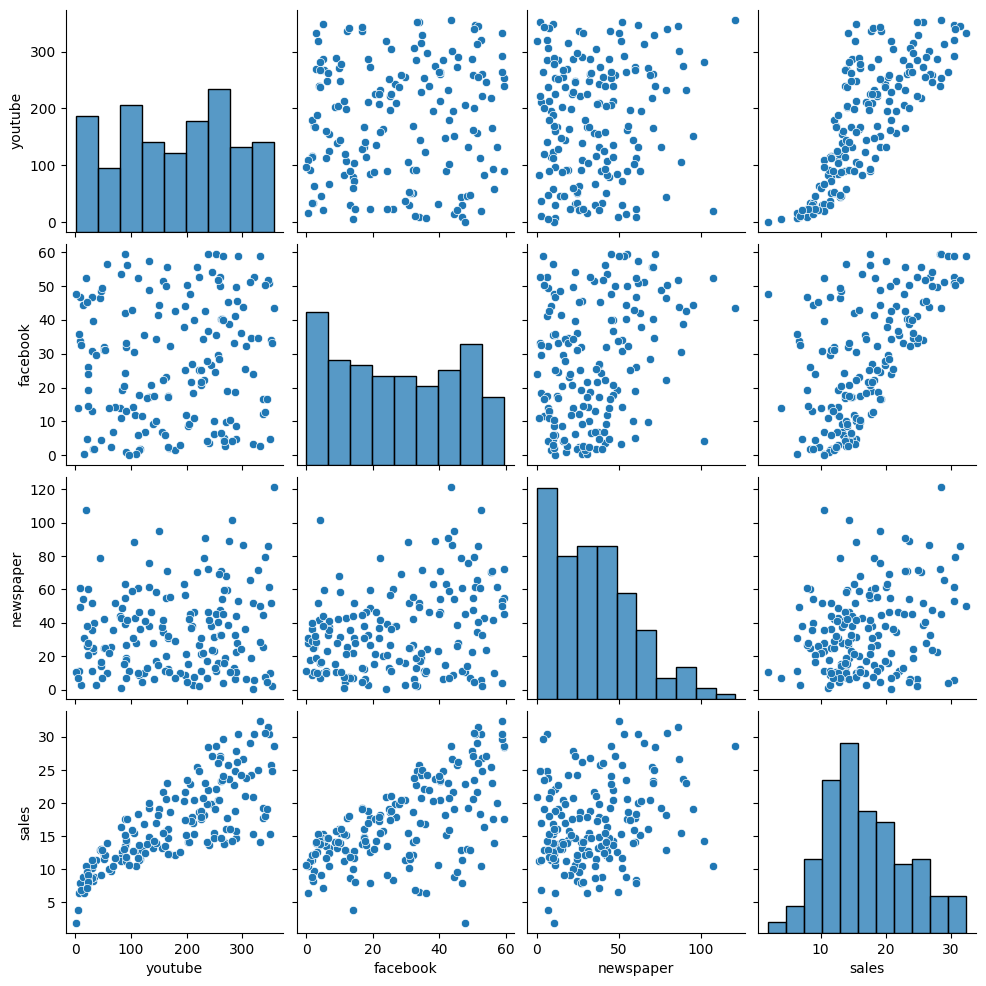

In [ ]:
sns.pairplot(marketing)

In [ ]:
marketing.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

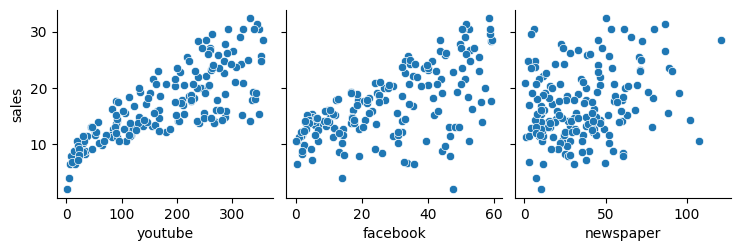

In [ ]:
sns.pairplot(marketing, x_vars=['youtube', 'facebook', 'newspaper'], y_vars = 'sales')

<Axes: >

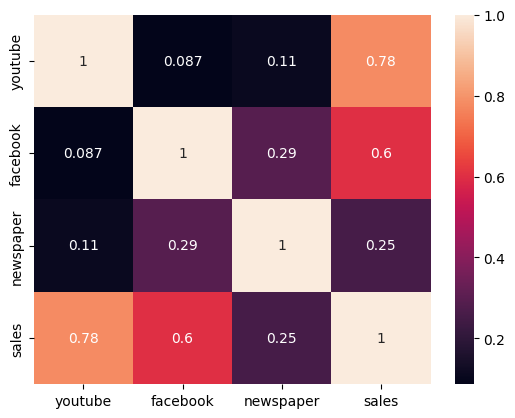

In [ ]:
sns.heatmap(marketing.corr(), annot=True)

# **Modelagem**

In [ ]:
x=marketing[['youtube', 'facebook', 'newspaper']]
y= marketing[['sales']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size = 0.7, test_size=0.3, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)

# **Calculando a Predição**

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(Y_test, y_pred)

In [ ]:
print("r_quadrado: ", r)

r_quadrado:  0.882423505618885


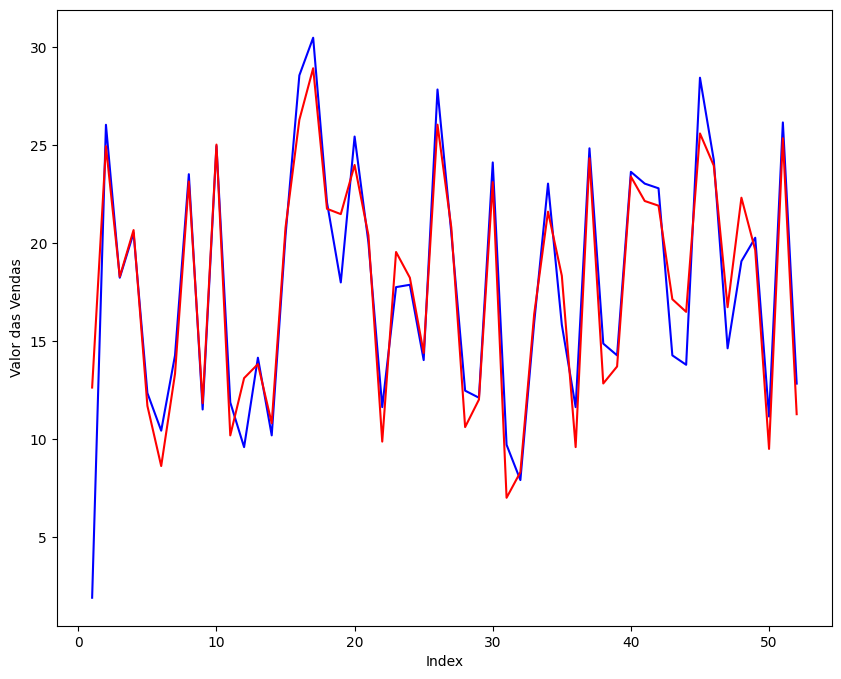

In [ ]:
c = [i for i in range(1,53, 1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c, Y_test, color="blue")
plt.plot(c, y_pred, color = "red")
plt.xlabel("Index")
plt.ylabel("Valor das Vendas");